In [ ]:
#libraries
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt
import seaborn as sns
import xgboost as xgb
import warnings
warnings.filterwarnings('ignore')


In [ ]:
pip install catboost

In [ ]:
%matplotlib inline
sns.set()
#preprocess
from sklearn.model_selection import train_test_split, RandomizedSearchCV, GridSearchCV
from sklearn.preprocessing import MinMaxScaler, StandardScaler, LabelEncoder
from imblearn.over_sampling import SMOTE
#models
from sklearn.svm import SVC
from sklearn import metrics
from xgboost import XGBClassifier
from sklearn.model_selection import train_test_split, KFold, cross_val_score
from scipy.stats import randint as sp_randint
from sklearn.ensemble import BaggingClassifier,VotingClassifier, AdaBoostClassifier, StackingClassifier, RandomForestClassifier,ExtraTreesClassifier
from sklearn.neighbors import KNeighborsClassifier
from sklearn.tree import DecisionTreeClassifier
from scipy.stats import randint
from catboost import CatBoostClassifier
from sklearn.linear_model import LogisticRegression
from sklearn.datasets import make_classification
from imblearn.over_sampling import RandomOverSampler
#check
from sklearn.metrics import confusion_matrix, classification_report, accuracy_score, f1_score, recall_score, precision_score
#save
import pickle as pk

In [ ]:
df = pd.read_csv('heart_2020_cleaned.csv')
df.head()

,HeartDisease,BMI,Smoking,AlcoholDrinking,Stroke,PhysicalHealth,MentalHealth,DiffWalking,Sex,AgeCategory,Race,Diabetic,PhysicalActivity,GenHealth,SleepTime,Asthma,KidneyDisease,SkinCancer
0,No,16.60,Yes,No,No,3.0,30.0,No,Female,55-59,White,Yes,Yes,Very good,5.0,Yes,No,Yes
1,No,20.34,No,No,Yes,0.0,0.0,No,Female,80 or older,White,No,Yes,Very good,7.0,No,No,No
2,No,26.58,Yes,No,No,20.0,30.0,No,Male,65-69,White,Yes,Yes,Fair,8.0,Yes,No,No
3,No,24.21,No,No,No,0.0,0.0,No,Female,75-79,White,No,No,Good,6.0,No,No,Yes
4,No,23.71,No,No,No,28.0,0.0,Yes,Female,40-44,White,No,Yes,Very good,8.0,No,No,No


In [ ]:
df.tail()

,HeartDisease,BMI,Smoking,AlcoholDrinking,Stroke,PhysicalHealth,MentalHealth,DiffWalking,Sex,AgeCategory,Race,Diabetic,PhysicalActivity,GenHealth,SleepTime,Asthma,KidneyDisease,SkinCancer
319790,Yes,27.41,Yes,No,No,7.0,0.0,Yes,Male,60-64,Hispanic,Yes,No,Fair,6.0,Yes,No,No
319791,No,29.84,Yes,No,No,0.0,0.0,No,Male,35-39,Hispanic,No,Yes,Very good,5.0,Yes,No,No
319792,No,24.24,No,No,No,0.0,0.0,No,Female,45-49,Hispanic,No,Yes,Good,6.0,No,No,No
319793,No,32.81,No,No,No,0.0,0.0,No,Female,25-29,Hispanic,No,No,Good,12.0,No,No,No
319794,No,46.56,No,No,No,0.0,0.0,No,Female,80 or older,Hispanic,No,Yes,Good,8.0,No,No,No


In [ ]:
df.shape



(319795, 18)

In [ ]:
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 319795 entries, 0 to 319794
Data columns (total 18 columns):
 #   Column            Non-Null Count   Dtype  
---  ------            --------------   -----  
 0   HeartDisease      319795 non-null  object 
 1   BMI               319795 non-null  float64
 2   Smoking           319795 non-null  object 
 3   AlcoholDrinking   319795 non-null  object 
 4   Stroke            319795 non-null  object 
 5   PhysicalHealth    319795 non-null  float64
 6   MentalHealth      319795 non-null  float64
 7   DiffWalking       319795 non-null  object 
 8   Sex               319795 non-null  object 
 9   AgeCategory       319795 non-null  object 
 10  Race              319795 non-null  object 
 11  Diabetic          319795 non-null  object 
 12  PhysicalActivity  319795 non-null  object 
 13  GenHealth         319795 non-null  object 
 14  SleepTime         319795 non-null  float64
 15  Asthma            319795 non-null  object 
 16  KidneyDisease     31

In [ ]:
df.columns

Index(['HeartDisease', 'BMI', 'Smoking', 'AlcoholDrinking', 'Stroke',
       'PhysicalHealth', 'MentalHealth', 'DiffWalking', 'Sex', 'AgeCategory',
       'Race', 'Diabetic', 'PhysicalActivity', 'GenHealth', 'SleepTime',
       'Asthma', 'KidneyDisease', 'SkinCancer'],
      dtype='object')

**Check Null Values**

In [ ]:
df.isna().sum()


HeartDisease        0
BMI                 0
Smoking             0
AlcoholDrinking     0
Stroke              0
PhysicalHealth      0
MentalHealth        0
DiffWalking         0
Sex                 0
AgeCategory         0
Race                0
Diabetic            0
PhysicalActivity    0
GenHealth           0
SleepTime           0
Asthma              0
KidneyDisease       0
SkinCancer          0
dtype: int64

In [ ]:
df['HeartDisease'].value_counts()

HeartDisease
No     292422
Yes     27373
Name: count, dtype: int64

In [ ]:
df.duplicated().sum()

18078

In [ ]:
#drop duplicates
df.drop_duplicates(inplace=True)

In [ ]:
df.shape

(301717, 18)

<function matplotlib.pyplot.show(close=None, block=None)>

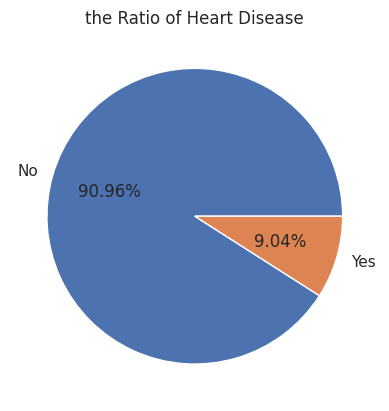

In [ ]:
#show Ratio of Heart Disease from data
plt.pie(x = df['HeartDisease'].value_counts() ,autopct='%1.2f%%' ,labels=df['HeartDisease'].value_counts().index)
plt.title('the Ratio of Heart Disease')
plt.show

# **Data Analysis & Visualization using Seaborn Library, pyplot**

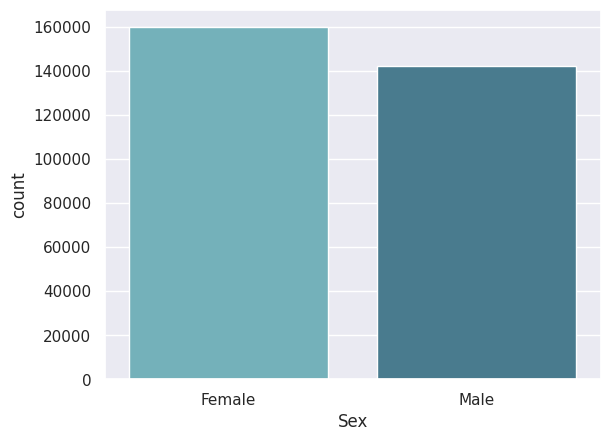

In [ ]:
#show how many of Male and female
sns.countplot(x = df['Sex'], palette='GnBu_d')
plt.show()

In [ ]:
df.groupby(['Sex','HeartDisease'])['HeartDisease'].count()

Sex     HeartDisease
Female  No              148458
        Yes              11213
Male    No              125998
        Yes              16048
Name: HeartDisease, dtype: int64

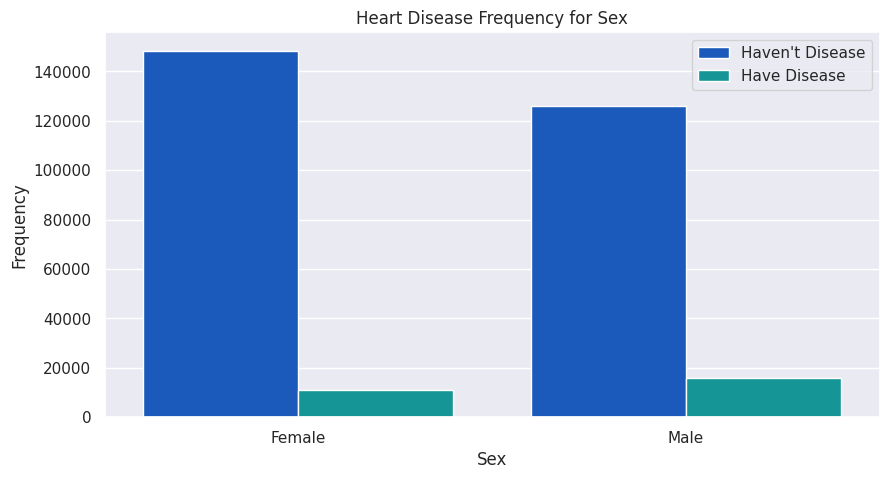

In [ ]:
#show Heart Disease Frequency for Sex
plt.figure(figsize=(10,5))
sns.countplot(x = df['Sex'], data=df, hue='HeartDisease',palette="winter")
plt.title('Heart Disease Frequency for Sex')
plt.xlabel('Sex')
plt.legend(["Haven't Disease", "Have Disease"])
plt.ylabel('Frequency')
plt.show()


In [ ]:
#AgeCategory frequency
df['AgeCategory'].value_counts()

AgeCategory
65-69          31670
60-64          31219
70-74          29273
55-59          27610
50-54          23736
80 or older    23352
75-79          20713
45-49          20518
18-24          19998
40-44          19837
35-39          19526
30-34          17953
25-29          16312
Name: count, dtype: int64

In [ ]:
df.groupby(['AgeCategory','HeartDisease'])['HeartDisease'].count()

AgeCategory  HeartDisease
18-24        No              19868
             Yes               130
25-29        No              16179
             Yes               133
30-34        No              17727
             Yes               226
35-39        No              19230
             Yes               296
40-44        No              19351
             Yes               486
45-49        No              19775
             Yes               743
50-54        No              22353
             Yes              1383
55-59        No              25411
             Yes              2199
60-64        No              27898
             Yes              3321
65-69        No              27596
             Yes              4074
70-74        No              24456
             Yes              4817
75-79        No              16686
             Yes              4027
80 or older  No              17926
             Yes              5426
Name: HeartDisease, dtype: int64

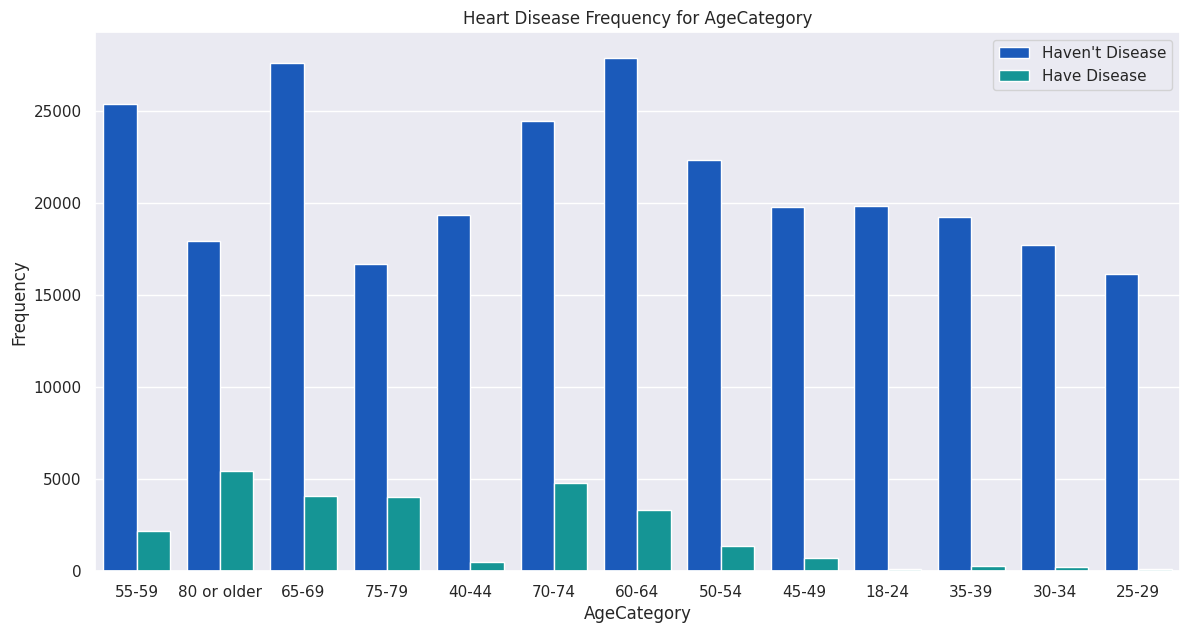

In [ ]:
#show Heart Disease Frequency for AgeCategory
plt.figure(figsize=(14,7))
sns.countplot(x='AgeCategory', data=df, hue='HeartDisease',palette="winter")
plt.title('Heart Disease Frequency for AgeCategory')
plt.xlabel('AgeCategory')
plt.legend(["Haven't Disease", "Have Disease"])
plt.ylabel('Frequency')
plt.show()

In [ ]:
#the count of people Smoking
df['Smoking'].value_counts()

Smoking
No     174312
Yes    127405
Name: count, dtype: int64

In [ ]:
df.groupby(['Sex','AgeCategory','Smoking','HeartDisease'])['HeartDisease'].count()

Sex     AgeCategory  Smoking  HeartDisease
Female  18-24        No       No              7963
                              Yes               40
                     Yes      No              1132
                              Yes               10
        25-29        No       No              5746
                                              ... 
Male    75-79        Yes      Yes             1552
        80 or older  No       No              2905
                              Yes             1086
                     Yes      No              3512
                              Yes             1724
Name: HeartDisease, Length: 104, dtype: int64

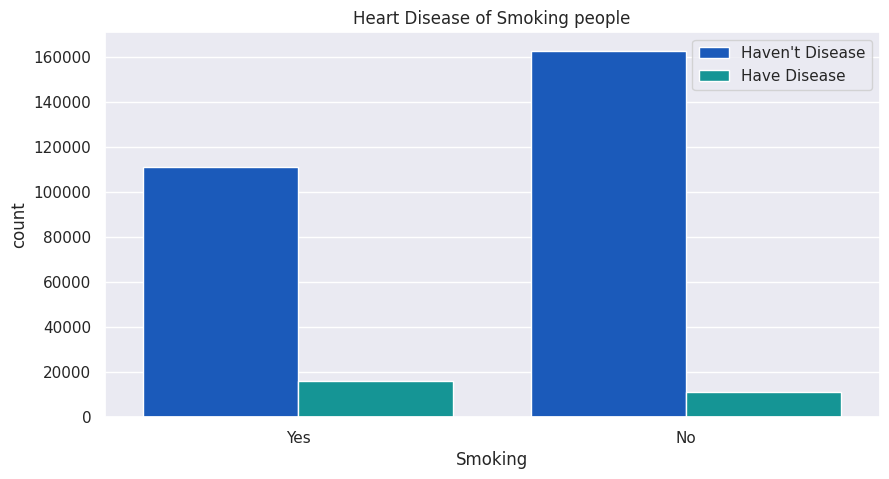

In [ ]:
#show Heart Disease Frequency for Smoking
plt.figure(figsize=(10,5))
sns.countplot(x='Smoking',data=df,hue='HeartDisease',palette='winter')
plt.title('Heart Disease of Smoking people')
plt.legend(["Haven't Disease", "Have Disease"])
plt.xlabel('Smoking')
plt.show()


In [ ]:
# I want to Know how many people drink the AlcoholDrinking or not
df['AlcoholDrinking'].value_counts()

AlcoholDrinking
No     280136
Yes     21581
Name: count, dtype: int64

In [ ]:
df.groupby(['AlcoholDrinking','HeartDisease'])['HeartDisease'].count()

AlcoholDrinking  HeartDisease
No               No              254016
                 Yes              26120
Yes              No               20440
                 Yes               1141
Name: HeartDisease, dtype: int64

In [ ]:
df.groupby(['Sex','AgeCategory','AlcoholDrinking','PhysicalActivity','HeartDisease'])['HeartDisease'].count()

Sex     AgeCategory  AlcoholDrinking  PhysicalActivity  HeartDisease
Female  18-24        No               No                No              1419
                                                        Yes                9
                                      Yes               No              6942
                                                        Yes               38
                     Yes              No                No                66
                                                                        ... 
Male    80 or older  No               Yes               Yes             1780
                     Yes              No                No                59
                                                        Yes               34
                                      Yes               No               127
                                                        Yes               41
Name: HeartDisease, Length: 208, dtype: int64

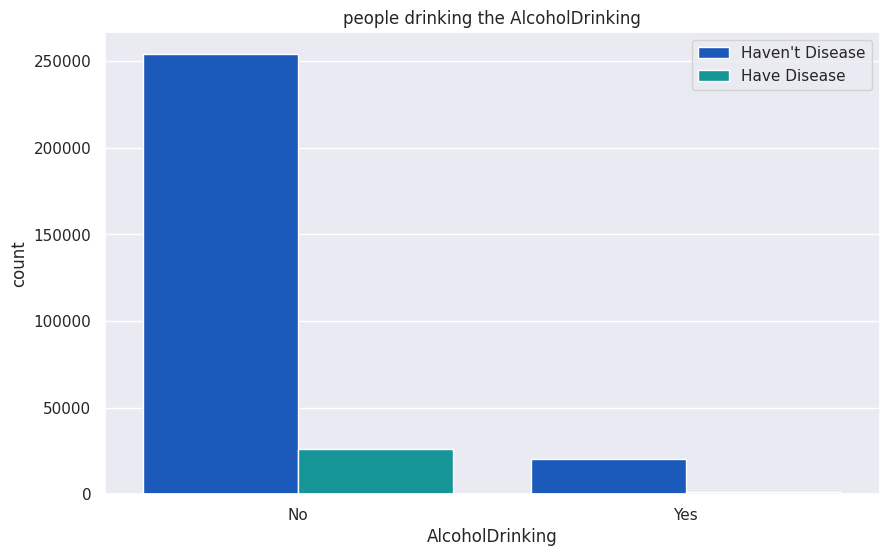

In [ ]:
#Show how many people drink the AlcoholDrinking or not
plt.figure(figsize=(10,6))
sns.countplot(x=df['AlcoholDrinking'],data=df , hue='HeartDisease',palette='winter')
plt.title('people drinking the AlcoholDrinking')
plt.legend(["Haven't Disease", "Have Disease"])
plt.xlabel('AlcoholDrinking')
plt.show()

In [ ]:
#I want to know how many people have KidneyDisease
df['KidneyDisease'].value_counts()

KidneyDisease
No     289941
Yes     11776
Name: count, dtype: int64

In [ ]:
#show the peolple who have KidneyDisease and HeartDisease
df.groupby(['KidneyDisease','HeartDisease'])['HeartDisease'].count()

KidneyDisease  HeartDisease
No             No              266134
               Yes              23807
Yes            No                8322
               Yes               3454
Name: HeartDisease, dtype: int64

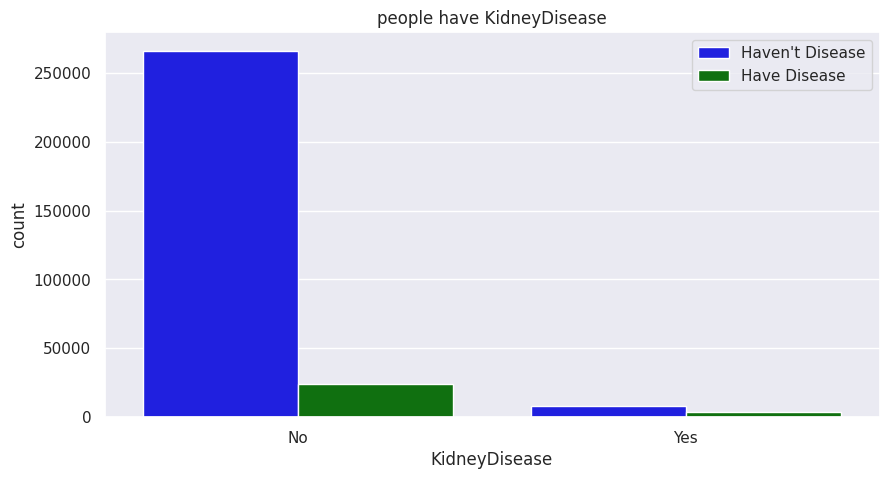

In [ ]:
plt.figure(figsize=(10,5))
sns.countplot( x = 'KidneyDisease', data=df, hue='HeartDisease',palette=['blue','green'])
plt.title('people have KidneyDisease')
plt.legend(["Haven't Disease", "Have Disease"])
plt.show()

In [ ]:
df.groupby(['Sex','KidneyDisease'])['KidneyDisease'].count()

Sex     KidneyDisease
Female  No               153218
        Yes                6453
Male    No               136723
        Yes                5323
Name: KidneyDisease, dtype: int64

In [ ]:
#Show the SkinCancer
df['SkinCancer'].value_counts()

SkinCancer
No     272425
Yes     29292
Name: count, dtype: int64

In [ ]:
#Show people have SkinCancer
df.groupby(['Sex','SkinCancer'])['SkinCancer'].count()

Sex     SkinCancer
Female  No            144876
        Yes            14795
Male    No            127549
        Yes            14497
Name: SkinCancer, dtype: int64

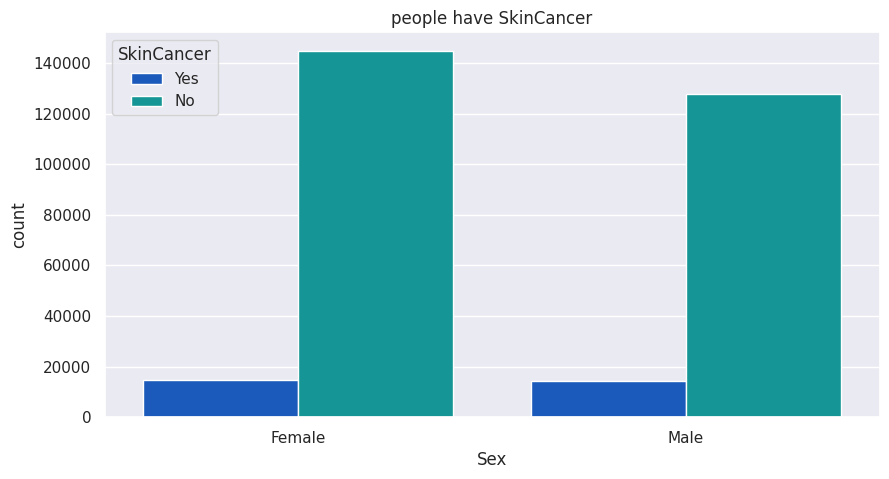

In [ ]:
plt.figure(figsize=(10,5))
sns.countplot(x='Sex',data=df, hue='SkinCancer',palette='winter')
plt.title('people have SkinCancer')
plt.show()


In [ ]:
df.groupby(['Sex','SkinCancer','HeartDisease'])['HeartDisease'].count()

Sex     SkinCancer  HeartDisease
Female  No          No              135339
                    Yes               9537
        Yes         No               13119
                    Yes               1676
Male    No          No              114793
                    Yes              12756
        Yes         No               11205
                    Yes               3292
Name: HeartDisease, dtype: int64

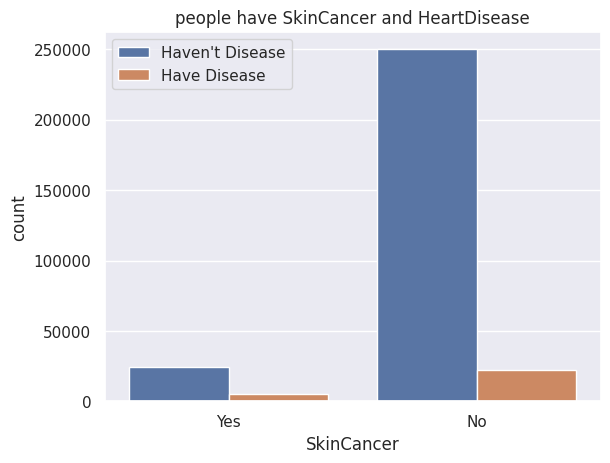

In [ ]:
sns.countplot(x = 'SkinCancer', data=df , hue = 'HeartDisease')
plt.title('people have SkinCancer and HeartDisease')
plt.legend(["Haven't Disease", "Have Disease"])
plt.show()

**Check the Distribution and skewness of the features**

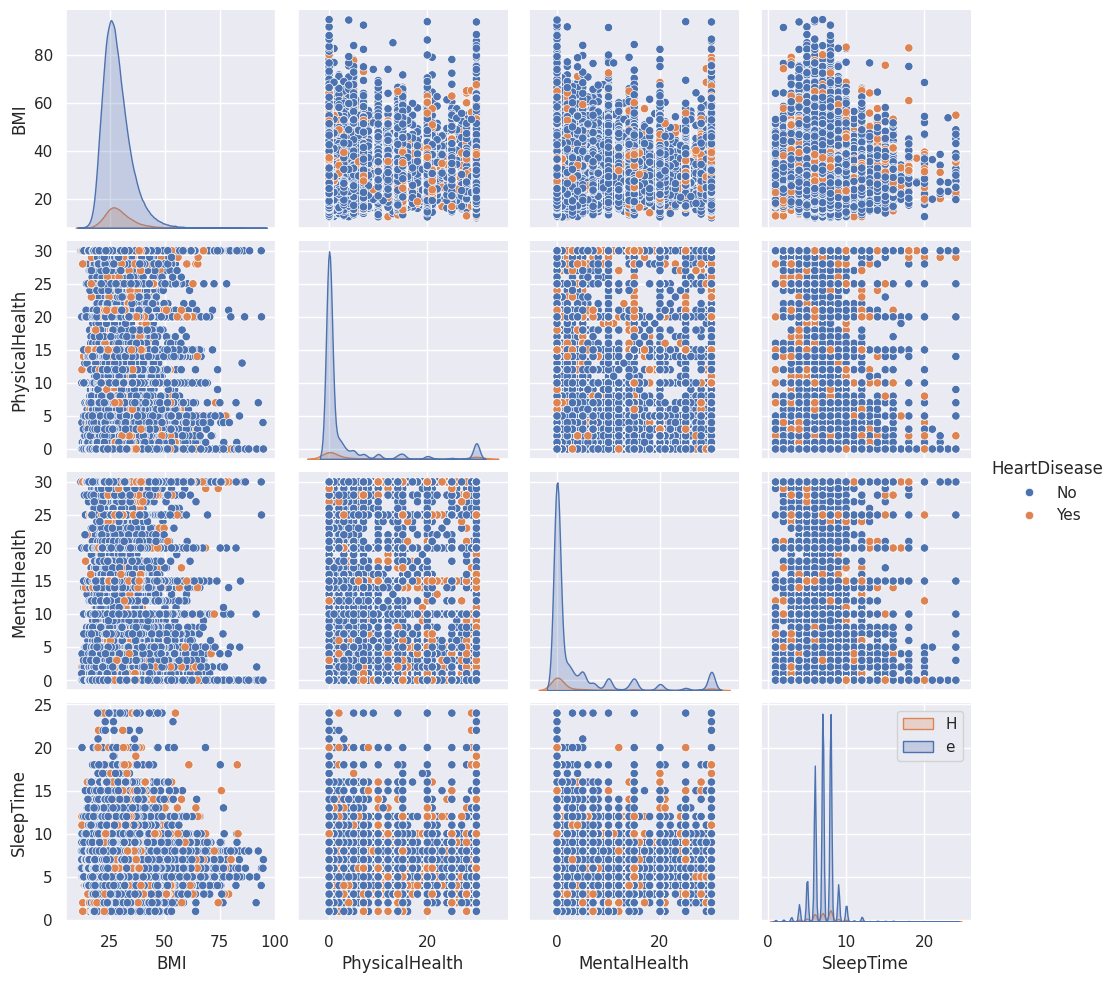

In [ ]:
sns.pairplot(data = df , hue= 'HeartDisease')
plt.legend('HeartDisease')

In [ ]:
label=LabelEncoder()
for col in df:
    df[col]=label.fit_transform(df[col])
df

,HeartDisease,BMI,Smoking,AlcoholDrinking,Stroke,PhysicalHealth,MentalHealth,DiffWalking,Sex,AgeCategory,Race,Diabetic,PhysicalActivity,GenHealth,SleepTime,Asthma,KidneyDisease,SkinCancer
0,0,223,1,0,0,3,30,0,0,7,5,2,1,4,4,1,0,1
1,0,524,0,0,1,0,0,0,0,12,5,0,1,4,6,0,0,0
2,0,1103,1,0,0,20,30,0,1,9,5,2,1,1,7,1,0,0
3,0,883,0,0,0,0,0,0,0,11,5,0,0,2,5,0,0,1
4,0,837,0,0,0,28,0,1,0,4,5,0,1,4,7,0,0,0
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
319790,1,1180,1,0,0,7,0,1,1,8,3,2,0,1,5,1,0,0
319791,0,1397,1,0,0,0,0,0,1,3,3,0,1,4,4,1,0,0
319792,0,886,0,0,0,0,0,0,0,5,3,0,1,2,5,0,0,0
319793,0,1658,0,0,0,0,0,0,0,1,3,0,0,2,11,0,0,0


In [ ]:
x = df.drop('HeartDisease',axis=1)
y = df[['HeartDisease']]

In [ ]:
xtrain, xtest, ytrain, ytest = train_test_split(x, y, train_size=.70,random_state=42)

In [ ]:
Clf = DecisionTreeClassifier()

In [ ]:
Clf.fit(xtrain,ytrain)

DecisionTreeClassifier()

In [ ]:
Clf.score(xtest,ytest) # after sampling

0.8542909540854655

In [ ]:
Clf.score(x,y)

0.9545567535140546

**Over Sampling**

In [ ]:
over = RandomOverSampler(random_state=42)

In [ ]:
x_new , y_new = over.fit_resample(x,y)

**Hold Out Cross Validation**



In [ ]:
xtrain, xtest, ytrain, ytest = train_test_split(x_new, y_new, train_size=.70,random_state=42)

In [ ]:
dt = DecisionTreeClassifier()

In [ ]:
dt.fit(xtrain,ytrain)

DecisionTreeClassifier()

In [ ]:
dt.score(xtest,ytest) # after sampling

0.9481095983579678

In [ ]:
dt.score(xtrain,ytrain) # after sampling

0.9979361749748854

**Without sampling¶**

In [ ]:
x.shape

(301717, 17)

In [ ]:
xtrain1, xtest1, ytrain1, ytest1 = train_test_split(x, y, train_size=.75,random_state=42)

In [ ]:
dt.fit(xtrain1, ytrain1)

DecisionTreeClassifier()

In [ ]:
dt.score(xtest1,ytest1) # imbalanced old data

0.8534535330770251

**Random Forest¶**

In [ ]:
# Focal cell:
rf = RandomForestClassifier()

# Train the random forest model
rf.fit(xtrain, ytrain)

# Calculate the accuracy score on the training data
train_score = rf.score(xtrain, ytrain)
print("Training accuracy:", train_score)

# Calculate the accuracy score on the testing data
test_score = rf.score(xtest, ytest)
print("Testing accuracy:", test_score)

Training accuracy: 0.9979361749748854
Testing accuracy: 0.9642566525377413


In [ ]:
# Create an instance of XGBClassifier
xgb = XGBClassifier()

# Fit the model on the training data
xgb.fit(xtrain, ytrain)

# Calculate the accuracy score on the training data
train_score = xgb.score(xtrain, ytrain)
print("Training accuracy:", train_score)

# Calculate the accuracy score on the test data
test_score = xgb.score(xtest, ytest)
print("Testing accuracy:", test_score)

Training accuracy: 0.7884852617388182
Testing accuracy: 0.7823517980980604


**K Fold Cross Validation¶**

In [ ]:
kfold = KFold(n_splits=5, shuffle=True) #each fold contain 25% data

In [ ]:
result = cross_val_score(rf, x_new, y_new, cv=kfold)

In [ ]:
result

array([0.96806427, 0.96820091, 0.96844656, 0.96812774, 0.96760853])

In [ ]:
result.mean()

0.9680896025483637

In [ ]:
result.max()

0.9684465577234884

In [ ]:
result.min()

0.9676085332750359

**dimantionally reduction using pca**

In [ ]:
mmx = MinMaxScaler()

In [ ]:
scaled_x = mmx.fit_transform(x_new)

In [ ]:
scaled_x.shape

(548912, 17)

In [ ]:
scaled_x

array([[0.06189287, 1.        , 0.        , ..., 1.        , 0.        ,
        1.        ],
       [0.14543436, 0.        , 0.        , ..., 0.        , 0.        ,
        0.        ],
       [0.30613378, 1.        , 0.        , ..., 1.        , 0.        ,
        0.        ],
       ...,
       [0.18262559, 1.        , 1.        , ..., 0.        , 0.        ,
        0.        ],
       [0.19816819, 1.        , 0.        , ..., 0.        , 0.        ,
        1.        ],
       [0.3719123 , 0.        , 0.        , ..., 0.        , 0.        ,
        0.        ]])

**PCA**

In [ ]:
from sklearn.decomposition import PCA
pca = PCA(n_components=3)
x_pca = pca.fit_transform(scaled_x)

In [ ]:
x_pca

array([[ 0.24444379,  0.1431673 , -0.79279698],
       [-0.43084215,  0.57785808, -0.08643726],
       [ 0.35480238, -0.54571324, -0.18254882],
       ...,
       [-0.16448625,  0.01443664, -0.87914405],
       [-0.08600004, -0.84354029, -0.11182521],
       [-0.69424561, -0.19399972,  0.42716702]])

In [ ]:
features = pd.DataFrame(x_pca, columns=['pca1','pca2','pca3'])

In [ ]:
xtrain, xtest, ytrain, ytest = train_test_split(features, y_new, train_size=.70,random_state=42)

In [ ]:
xtrain

,pca1,pca2,pca3
78195,-0.649449,0.629766,-0.156347
17062,-0.574127,0.616781,-0.152667
158180,-0.664689,0.647996,-0.147958
333159,-0.189686,-0.754006,-0.203255
357122,-0.319738,-0.722500,-0.271081
...,...,...,...
110268,-0.693390,-0.194221,0.433502
259178,0.488314,0.354879,-0.655337
365838,1.238358,-0.490831,0.424942
131932,0.817235,0.991935,0.350486


**Linear SGDClassifier¶**

In [ ]:
from sklearn.linear_model import SGDClassifier
# Create an instance of SGDClassifier
lsgd = SGDClassifier()

# Fit the model to the training data
lsgd.fit(xtrain, ytrain)

# Evaluate the model on the testing data
testing_score = lsgd.score(xtest, ytest)
print("Testing score:", testing_score)

# Evaluate the model on the training data
training_score = lsgd.score(xtrain, ytrain)
print("Training score:", training_score)

Testing score: 0.6660128496301784
Training score: 0.6665816499148965


**KNeighborsClassifier**

In [ ]:
# Create a KNN classifier object with 100 neighbors
knn = KNeighborsClassifier(n_neighbors=100)

# Train the classifier using the training data
knn.fit(xtrain, ytrain)

# Calculate the accuracy score on the test data
testing_score= knn.score(xtest, ytest)  # testing
print("Testing score:", testing_score)

# Calculate the accuracy score on the training data
training_score= knn.score(xtrain, ytrain)  # training
print("Training score:", training_score)

Testing score: 0.7487156442425641
Training score: 0.7541862075068057


**XGBClassifier**

In [ ]:
# Create an instance of XGBClassifier
xgb = XGBClassifier()

# Fit the model on the training data
xgb.fit(xtrain, ytrain)

# Calculate the accuracy score on the training data
train_score = xgb.score(xtrain, ytrain)
print("Training accuracy:", train_score)

# Calculate the accuracy score on the test data
test_score = xgb.score(xtest, ytest)
print("Testing accuracy:", test_score)

Training accuracy: 0.758912444890927
Testing accuracy: 0.7537133973790641


**RandomForestClassifier**

In [ ]:
# Focal cell:
rf = RandomForestClassifier()

# Train the random forest model
rf.fit(xtrain, ytrain)

# Calculate the accuracy score on the training data
train_score = rf.score(xtrain, ytrain)
print("Training accuracy:", train_score)

# Calculate the accuracy score on the testing data
test_score = rf.score(xtest, ytest)
print("Testing accuracy:", test_score)

Training accuracy: 0.9979361749748854
Testing accuracy: 0.9606495257296234


**ExtraTreesClassifier**

In [ ]:
# Create an instance of the ExtraTreesClassifier
extr = ExtraTreesClassifier()

# Fit the model to the training data
extr.fit(xtrain, ytrain)

# Evaluate the model on the testing data
test_score = extr.score(xtest, ytest)
print("Testing Score:", test_score)

# Evaluate the model on the training data
train_score = extr.score(xtrain, ytrain)
print("Training Score:", train_score)

Testing Score: 0.9755881317026367
Training Score: 0.9979361749748854


**DecisionTreeClassifier¶**

In [ ]:
# Create an instance of the DecisionTreeClassifier
dt = DecisionTreeClassifier()

# Fit the model to the training data
dt.fit(xtrain,ytrain)

# Evaluate the model on the testing data
test_score= dt.score(xtest,ytest) # after sampling
print("Testing Score:", test_score)

# Evaluate the model on the training data
train_score= dt.score(xtrain,ytrain) # after sampling
print("Training Score:", train_score)

Testing Score: 0.9469679487958026
Training Score: 0.9979361749748854


**LogisticRegression**

In [ ]:
# Create a Logistic Regression model
lg = LogisticRegression()

# Train the model on the training data
lg.fit(xtrain, ytrain)

# Calculate the accuracy score on the test data
test_score = lg.score(xtest, ytest)
print("Testing Score:", test_score)
# Calculate the accuracy score on the training data
train_score = lg.score(xtrain, ytrain)
print("Training Score:", train_score)

Testing Score: 0.6820384517288703
Training Score: 0.6821162925062071


**Support Vector Machine (SVM)**

In [ ]:
'''#take huge time thats why its stoped

from sklearn import svm
from sklearn.svm import SVC
# Create an instance of SVM classifier with linear kernel
sv = SVC(kernel='linear')

# Train the classifier using the training data
sv.fit(xtrain, ytrain)

# Calculate the accuracy score on the training data
train_score= sv.score(xtrain, ytrain)
print("Training Score:", train_score)

# Calculate the accuracy score on the testing data
test_score= sv.score(xtest, ytest)
print("Testing Score:", test_score)'''

'#take huge time thats why its stoped\n\nfrom sklearn import svm\nfrom sklearn.svm import SVC\n# Create an instance of SVM classifier with linear kernel\nsv = SVC(kernel=\'linear\')\n\n# Train the classifier using the training data\nsv.fit(xtrain, ytrain)\n\n# Calculate the accuracy score on the training data\ntrain_score= sv.score(xtrain, ytrain)\nprint("Training Score:", train_score)\n\n# Calculate the accuracy score on the testing data\ntest_score= sv.score(xtest, ytest)\nprint("Testing Score:", test_score)'

**classification model**

In [ ]:
# Split data into training and testing sets
xtrain, xtest, ytrain, ytest = train_test_split(x_new, y_new, test_size=0.3, random_state=42)

# Standardize features
scaler = StandardScaler()
xtrain = scaler.fit_transform(xtrain)
xtest = scaler.transform(xtest)

# Initialize and train classification models
models = {
    'Decision Tree': DecisionTreeClassifier(),
    'Random Forest': RandomForestClassifier(),
    'Logistic Regression': LogisticRegression(),
    'ExtraTreesClassifier': ExtraTreesClassifier(),
    'XGBClassifier': XGBClassifier()
    #'Support Vector Machine': SVC()
}

for model_name, model in models.items():
    # Train the model
    model.fit(xtrain, ytrain)

    # Make predictions
    y_pred = model.predict(xtest)

    # Evaluate accuracy
    accuracy = accuracy_score(ytest, y_pred)
    print(f'{model_name} Accuracy: {accuracy:.4f}')

Decision Tree Accuracy: 0.9485
Random Forest Accuracy: 0.9642
Logistic Regression Accuracy: 0.7465
ExtraTreesClassifier Accuracy: 0.9720
XGBClassifier Accuracy: 0.7824


**Ensemble**

In [ ]:
# Bagging
bagging_model = RandomForestClassifier(n_estimators=10, random_state=42)
bagging_model.fit(xtrain, ytrain)
bagging_pred = bagging_model.predict(xtest)
print("Bagging Accuracy:", accuracy_score(ytest, bagging_pred))

# Boosting
boosting_model = CatBoostClassifier(iterations=100, learning_rate=0.1, depth=6, random_state=42)
boosting_model.fit(xtrain, ytrain)
boosting_pred = boosting_model.predict(xtest)
print("Boosting Accuracy:", accuracy_score(ytest, boosting_pred))

# Stacking
base_models = [
    ('decision_tree', DecisionTreeClassifier()),
    ('logistic_regression', LogisticRegression())
]
stacking_model = StackingClassifier(estimators=base_models, final_estimator=LogisticRegression())
stacking_model.fit(xtrain, ytrain)
stacking_pred = stacking_model.predict(xtest)
print("Stacking Accuracy:", accuracy_score(ytest, stacking_pred))

Bagging Accuracy: 0.9640016031674703
0:	learn: 0.6660496	total: 175ms	remaining: 17.4s
1:	learn: 0.6438644	total: 276ms	remaining: 13.5s
2:	learn: 0.6242326	total: 369ms	remaining: 11.9s
3:	learn: 0.6082930	total: 462ms	remaining: 11.1s
4:	learn: 0.5948690	total: 558ms	remaining: 10.6s
5:	learn: 0.5832117	total: 638ms	remaining: 9.99s
6:	learn: 0.5731179	total: 755ms	remaining: 10s
7:	learn: 0.5641725	total: 861ms	remaining: 9.91s
8:	learn: 0.5566621	total: 968ms	remaining: 9.79s
9:	learn: 0.5495321	total: 1.08s	remaining: 9.73s
10:	learn: 0.5431592	total: 1.19s	remaining: 9.63s
11:	learn: 0.5379904	total: 1.27s	remaining: 9.31s
12:	learn: 0.5331779	total: 1.38s	remaining: 9.22s
13:	learn: 0.5291321	total: 1.49s	remaining: 9.14s
14:	learn: 0.5255276	total: 1.59s	remaining: 9s
15:	learn: 0.5221511	total: 1.7s	remaining: 8.91s
16:	learn: 0.5194906	total: 1.81s	remaining: 8.85s
17:	learn: 0.5166814	total: 1.92s	remaining: 8.75s
18:	learn: 0.5145589	total: 2.04s	remaining: 8.7s
19:	learn: 

**Modeling**

In [ ]:
def evaluate_model(model, xtest, ytest):

    # Predict Test Data
    ypred = model.predict(xtest)

    # Calculate accuracy, precision, recall, f1-score, and kappa score
    acc = metrics.accuracy_score(ytest, ypred)
    prec = metrics.precision_score(ytest, ypred)
    rec = metrics.recall_score(ytest, ypred)
    f1 = metrics.f1_score(ytest, ypred)
    kappa = metrics.cohen_kappa_score(ytest, ypred)

    # Calculate area under curve (AUC)
    ypred_proba = model.predict_proba(xtest)[::,1]
    fpr, tpr, _ = metrics.roc_curve(ytest, ypred_proba)
    auc = metrics.roc_auc_score(ytest, ypred_proba)

    # Display confussion matrix
    cm = metrics.confusion_matrix(ytest, ypred)

    return {'acc': acc, 'prec': prec, 'rec': rec, 'f1': f1, 'kappa': kappa,
            'fpr': fpr, 'tpr': tpr, 'auc': auc, 'cm': cm}

In [ ]:
xtrain

array([[-0.76049382, -0.99107662, -0.249487  , ..., -0.43410063,
        -0.29095031, -0.39599276],
       [ 0.64561895, -0.99107662, -0.249487  , ..., -0.43410063,
        -0.29095031, -0.39599276],
       [-0.86879755, -0.99107662, -0.249487  , ..., -0.43410063,
        -0.29095031, -0.39599276],
       ...,
       [ 0.63460502,  1.00900373, -0.249487  , ..., -0.43410063,
        -0.29095031, -0.39599276],
       [-0.05193047, -0.99107662, -0.249487  , ...,  2.30361331,
        -0.29095031, -0.39599276],
       [-1.27814892, -0.99107662, -0.249487  , ..., -0.43410063,
        -0.29095031, -0.39599276]])

In [ ]:
# Building a model using KNeighborsClassifier
knn = KNeighborsClassifier(n_neighbors = 5)

knn.fit(xtrain, ytrain)


# Evaluate Model
knn_eval = evaluate_model(knn, xtest, ytest)

# Print result
print('Accuracy:', knn_eval['acc'])
print('Precision:', knn_eval['prec'])
print('Recall:', knn_eval['rec'])
print('F1 Score:', knn_eval['f1'])
print('Cohens Kappa Score:', knn_eval['kappa'])
print('Area Under Curve:', knn_eval['auc'])
print('Confusion Matrix:\n', knn_eval['cm'])

Accuracy: 0.8784993380861581
Precision: 0.8106979933808403
Recall: 0.9883558905138675
F1 Score: 0.8907550177998121
Cohens Kappa Score: 0.7568714947366632
Area Under Curve: 0.9410372828918991
Confusion Matrix:
 [[63096 19047]
 [  961 81570]]


In [ ]:
# Building a model using KNeighborsClassifier
rf1 = RandomForestClassifier()

rf1.fit(xtrain, ytrain)

# Evaluate Model
rf1_eval = evaluate_model(rf1, xtest, ytest)

# Print result
print('Accuracy:', rf1_eval['acc'])
print('Precision:', rf1_eval['prec'])
print('Recall:', rf1_eval['rec'])
print('F1 Score:', rf1_eval['f1'])
print('Cohens Kappa Score:', rf1_eval['kappa'])
print('Area Under Curve:', rf1_eval['auc'])
print('Confusion Matrix:\n', rf1_eval['cm'])

Accuracy: 0.9639955305634162
Precision: 0.9335635046411591
Recall: 0.9992730004483164
F1 Score: 0.9653013091747574
Cohens Kappa Score: 0.9279786890953363
Area Under Curve: 0.9965302767151999
Confusion Matrix:
 [[76274  5869]
 [   60 82471]]


In [ ]:
# Building a model using KNeighborsClassifier
extra = ExtraTreesClassifier()

extra.fit(xtrain, ytrain)


# Evaluate Model
extra_eval = evaluate_model(extra, xtest, ytest)

# Print result
print('Accuracy:', extra_eval['acc'])
print('Precision:', extra_eval['prec'])
print('Recall:', extra_eval['rec'])
print('F1 Score:', extra_eval['f1'])
print('Cohens Kappa Score:', extra_eval['kappa'])
print('Area Under Curve:', extra_eval['auc'])
print('Confusion Matrix:\n', extra_eval['cm'])

Accuracy: 0.9718899158337078
Precision: 0.9476508987266125
Recall: 0.9991033672195903
F1 Score: 0.9726971918628313
Cohens Kappa Score: 0.943772309491036
Area Under Curve: 0.9971589998692577
Confusion Matrix:
 [[77588  4555]
 [   74 82457]]


In [ ]:
# Building a model using KNeighborsClassifier
xgb = XGBClassifier()

xgb.fit(xtrain, ytrain)


# Evaluate Model
xgb_eval = evaluate_model(xgb, xtest, ytest)

# Print result
print('Accuracy:', xgb_eval['acc'])
print('Precision:', xgb_eval['prec'])
print('Recall:', xgb_eval['rec'])
print('F1 Score:', xgb_eval['f1'])
print('Cohens Kappa Score:', xgb_eval['kappa'])
print('Area Under Curve:', xgb_eval['auc'])
print('Confusion Matrix:\n', xgb_eval['cm'])

Accuracy: 0.7823517980980604
Precision: 0.7597178648510335
Recall: 0.8274224230895058
F1 Score: 0.7921260664551639
Cohens Kappa Score: 0.564609541608373
Area Under Curve: 0.861264728151387
Confusion Matrix:
 [[60545 21598]
 [14243 68288]]


In [ ]:
# Building a model using KNeighborsClassifier
dt1= DecisionTreeClassifier(random_state=0)
dt1.fit(xtrain, ytrain)


# Evaluate Model
dt1_eval = evaluate_model(rf1, xtest, ytest)

# Print result
print('Accuracy:', dt1_eval['acc'])
print('Precision:', dt1_eval['prec'])
print('Recall:', dt1_eval['rec'])
print('F1 Score:', dt1_eval['f1'])
print('Cohens Kappa Score:', dt1_eval['kappa'])
print('Area Under Curve:', dt1_eval['auc'])
print('Confusion Matrix:\n', dt1_eval['cm'])

Accuracy: 0.9639955305634162
Precision: 0.9335635046411591
Recall: 0.9992730004483164
F1 Score: 0.9653013091747574
Cohens Kappa Score: 0.9279786890953363
Area Under Curve: 0.9965302767151999
Confusion Matrix:
 [[76274  5869]
 [   60 82471]]


In [ ]:
# took much more time thats why its stoped
'''from sklearn.svm import SVC
# Building a model using KNeighborsClassifier
sv = SVC(kernel='linear')

sv.fit(xtrain, ytrain)


# Evaluate Model
sv_eval = evaluate_model(sv, xtest, ytest)

# Print result
print('Accuracy:', sv_eval['acc'])
print('Precision:', sv_eval['prec'])
print('Recall:', sv_eval['rec'])
print('F1 Score:', sv_eval['f1'])
print('Cohens Kappa Score:', sv_eval['kappa'])
print('Area Under Curve:', sv_eval['auc'])
print('Confusion Matrix:\n', sv_eval['cm'])'''

"from sklearn.svm import SVC\n# Building a model using KNeighborsClassifier\nsv = SVC(kernel='linear')\n\nsv.fit(xtrain, ytrain)\n\n\n# Evaluate Model\nsv_eval = evaluate_model(sv, xtest, ytest)\n\n# Print result\nprint('Accuracy:', sv_eval['acc'])\nprint('Precision:', sv_eval['prec'])\nprint('Recall:', sv_eval['rec'])\nprint('F1 Score:', sv_eval['f1'])\nprint('Cohens Kappa Score:', sv_eval['kappa'])\nprint('Area Under Curve:', sv_eval['auc'])\nprint('Confusion Matrix:\n', sv_eval['cm'])"

In [ ]:
# Split the data into training and testing sets
xtrain, xtest, ytrain, ytest = train_test_split(x_new, y_new, test_size=0.3, random_state=42)

# Define the individual models
model1 = DecisionTreeClassifier(random_state=42)
model2 = RandomForestClassifier()
model3 = ExtraTreesClassifier()

# Create the VotingClassifier ensemble
ensemble = VotingClassifier(
    estimators=[('dt1', model1),('rf1', model2),('extra', model3) ],
    voting='hard'  # You can also use 'soft' voting
)

# Train the ensemble model
ensemble.fit(xtrain, ytrain)

# Make predictions on the test set
y_pred = ensemble.predict(xtest)
print("y_prediction:", y_pred)

# Calculate the accuracy of the ensemble model
accuracy = accuracy_score(ytest, y_pred)
print("Accuracy:", accuracy)

y_prediction: [1 1 0 ... 1 1 0]
Accuracy: 0.9692604782782953


**save ai model**

In [ ]:
import pickle

In [ ]:
pickle.dump(extra, open('Heart Disease Prediction','wb'))

In [ ]:
reg = pickle.load(open('Heart Disease Prediction', 'rb'))